<a id='home'></a>

# Table of Contents
## 1. [Distributions](#1)
## 2. [Variability](#2)
## 3. [Empirical Sizing](#3)
## 4. [Tracking Multiple Metrics](#4)
## 5. [Simulations](#5)

In [1]:
from scipy.stats import binom
from scipy.stats import norm
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='1'></a>

# 1. Distributions

## 1.a. Normal Distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

1.64485362695
-1.95996398454
0.5
0.398942280401
0.977249868052
0.0227501319482


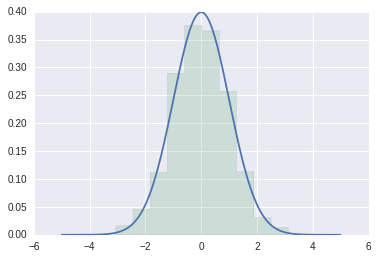

In [2]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
mean,var

x = np.arange(-5,5,.01)
plt.plot(x,norm.pdf(x))

r = norm.rvs(size=1000)
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2);

print norm.ppf(.95, loc=0, scale=1)
print norm.ppf(.025, loc=0, scale=1)
print norm.cdf(0, loc=0, scale=1)
print norm.pdf(0, loc=0, scale=1)
print norm.cdf(2, loc=0, scale=1)
print norm.sf(2, loc=0, scale=1)

## 1.b. Binominal Distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

0.0610961914062
0.971313476562
0.0286865234375
10.0
7.0


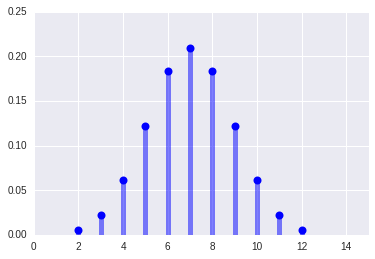

In [3]:
# distribution of 14 times fair coin toss
n, p = 14, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

fig, ax = plt.subplots(1, 1)

x = np.arange(binom.ppf(0.001, n, p),
              binom.ppf(0.9999, n, p))
# x = [e for e in range(14)]
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlim([0,15])

print binom.pmf(10,n,p) 
print binom.cdf(10,n,p)
print binom.sf(10,n,p) # 1-cdf
print binom.ppf(binom.cdf(10,n,p), n, p)
print binom.ppf(.60, n, p) # inverse of cdf - percentiles

#### Example

In [4]:
n = 2000.
event = 300
CI = .99
alpha = 1-CI
# point estimate
p_hat = event/n
# as a rule of thumb, if both values are bigger than five, use normal dist
print n*p_hat,n*(1-p_hat)
# z score 
zcrit = norm.ppf(1-alpha/2)
# standart error
SE = np.sqrt((p_hat*(1-p_hat))/n)
# margin of error
m = zcrit*SE
# Interval estimate
interval = (round(p_hat-m,3),round(p_hat+m,3))
p_hat,interval
# there is significant evidence that the ratio is different than 0.

300.0 1700.0


(0.15, (0.129, 0.171))

####  CTR simulation

http://www.marketingdistillery.com/2014/09/24/bayesian-modeling-of-click-through-rate-for-small-data/

In [5]:
# simulate a record of 100 impressions of an ad with 10% CTR 
p = .1
n = 100
binom.rvs(1, .1, loc=0, size=n, random_state=None)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

9.0 10.0
0.131865346824
0.583155512266
10.0


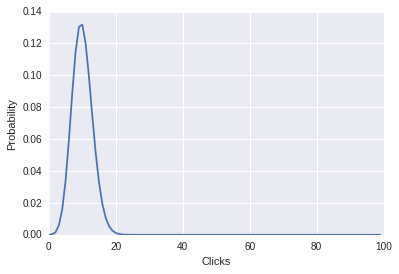

In [6]:
x = range(n)
plt.plot(x,binom.pmf(x,n,p))
plt.xlabel('Clicks')
plt.ylabel('Probability');
var,mu = binom.var(n,p),binom.mean(n,p)
print var,mu
print binom.pmf(10, n, p)
print binom.cdf(10, n, p)
print binom.ppf(.58, n, p)

#### Sign Test: Calculating p values with Binominal Distribution

In [7]:
# or use the calculator http://graphpad.com/quickcalcs/binomial1.cfm

# ex: 7 positive values out of 7 samples
n ,p = 7, .5
# the probability of 7 coin toss and 7 sucess
# one tail p value
print binom.pmf(7, n, p)
# 1-binom.cdf(6, n, p,)
# 1-binom.sf(6, n, p,)

# two tail p value 
# This is the chance of observing either 7 or more successes, 
# or 0 or fewer successes, in 7 trials. 
print 2*binom.sf(6, n, p,)

# since p_value is less than alpha level (.05) reject the null (no significant difference between samples)
# and so the sign test  dictates that there is significant evidence for positive change
# So lunch the experiment since it increases the CTR according to the result of sign test

0.0078125
0.015625


In [8]:
# ex: 5 positive values out of 7 samples
# one-tail P value
# This is the chance of observing 5 or more successes in 7 trials. 
print binom.pmf(5,n,p)+binom.pmf(6,n,p)+binom.pmf(7,n,p)
# or
print binom.sf(4,n,p)
# two-tail P value
# This is the chance of observing either 5 or more successes,
# or 2 or fewer successes, in 7 trials. 
print binom.sf(4,n,p)*2
# or
print binom.pmf(5,n,p)+binom.pmf(6,n,p)+binom.pmf(7,n,p)+\
      binom.pmf(0,n,p)+binom.pmf(2,n,p)+binom.pmf(1,n,p)

0.2265625
0.2265625
0.453125
0.453125


[HOME](#home)

<a id='2'></a>

# 2. Variability

## 2.a. Normality tests

NormaltestResult(statistic=0.44828905768897848, pvalue=0.79919961862449163)
(0.9991307854652405, 0.9317059516906738)


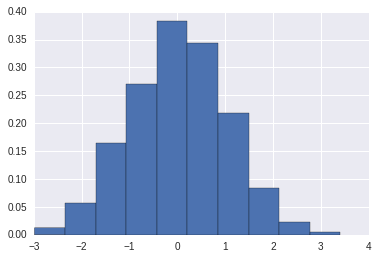

In [9]:
from scipy import stats

a = norm.rvs(size=1000)

plt.hist(a,normed=True);
print stats.normaltest(a) # D’Agostino and Pearson’s 
print stats.shapiro(a)    # Shapiro-Wilk's

## 2.b. Empirical vs Analytical Variability Example¶

0.730488657951355

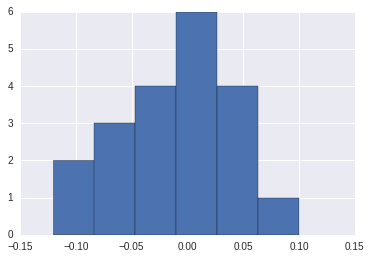

In [10]:
df = pd.read_csv("empirical_var_python.csv")
N = 50
alpha = .05
df['diff'] = df['Group 1']-df['Group 2']
# the distribution seems normal
df['diff'].hist(bins=6);
# normality test
stats.shapiro(df['diff'])[1] # data is normally dist.

In [11]:
# empirical standart deviation 
SD_e = round(df['diff'].std(ddof=1),4) # by default std calculates sample stdev
SD_e

0.0592

In [12]:
# empirical margin of error
z_star = norm.ppf(1-alpha/2)
m_e = round(SD_e*z_star,4)
m_e

0.116

In [13]:
# analytical standart error
df['p_pool'] = (df['Group 1'] + df['Group 2'])/2

def binom_SE(N,p):
    return np.sqrt((p*(1-p))*(2/N))

df['SE_pool'] = df['p_pool'].map(lambda x: round(binom_SE(N,x),4))


#analytical margin of error
df['m_a'] = (df['SE_pool']*z_star).map(lambda x: round(x,4))
df

,Group 1,Group 2,diff,p_pool,SE_pool,m_a
0,0.10,0.04,0.06,0.07,0.0510,0.1000
1,0.10,0.10,0.00,0.10,0.0600,0.1176
2,0.04,0.12,-0.08,0.08,0.0543,0.1064
3,0.14,0.08,0.06,0.11,0.0626,0.1227
4,0.00,0.10,-0.10,0.05,0.0436,0.0855
5,0.08,0.16,-0.08,0.12,0.0650,0.1274
6,0.18,0.12,0.06,0.15,0.0714,0.1399
7,0.08,0.20,-0.12,0.14,0.0694,0.1360
8,0.08,0.08,0.00,0.08,0.0543,0.1064
9,0.12,0.16,-0.04,0.14,0.0694,0.1360


In [14]:
# How many experiments yielded significant results against the null hypothesis given alpha is .05
print sum(abs(df['diff'])>df['m_a']) # calculated with analytical SE
print sum(abs(df['diff'])>m_e)       # calculated with empirical SD

1
1


## 2.c. Empirical Variability: Bootstrapping


0.7655019164085388

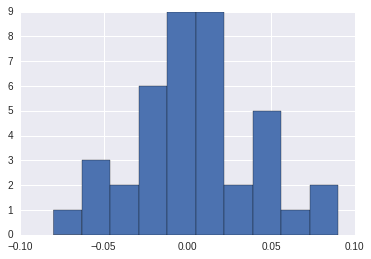

In [15]:
df = pd.read_csv("bootstrapping_python.csv")
N = 100
alpha = .05
df['diff'] = df['Group 1']-df['Group 2']
# the distribution seems normal
df['diff'].hist(bins=10);
# normality test
stats.shapiro(df['diff'])[1] # data is normally dist.

In [16]:
# 1.way of calculating CI with using empirical variability
sd_e = df['diff'].std()
x_bar = df['diff'].mean()
z_star = norm.ppf(1-alpha/2)
# empirical margin of error
m = sd_e * z_star
# confidence interval
CI_l,CI_h = round(x_bar-m,4),round(x_bar+m,4)
CI_l,CI_h

(-0.067, 0.0755)

In [17]:
# 2.way of calculating CI with using empirical variability
# find which value to choose as boundary
outlier = df.shape[0]*alpha/2 
# choose outliers from the ordered list
CI_l,CI_h = [round(e,4) for e in df['diff'].sort_values().iloc[[outlier,-outlier-1]]]
CI_l,CI_h

/home/samet/anaconda2/lib/python2.7/site-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


(-0.06, 0.08)

[HOME](#home)

<a id='3'></a>

# 3. Empirical Sizing

## 3.a. Calculate Required Sample Size for Mean Metrics

In [43]:
def calc_SE(st,se,n):
    # a simple pooled SE
    return round(np.sqrt((st**2/n)+(se**2/n)),2) 

def get_z_star(alpha):
    return round(norm.ppf(1-alpha/2),2)

def CI(SE,z_star,mu=0):
    # calculate to show on graph
    return mu-SE*z_star,mu+SE*z_star

def compare_densities(d,SE,n,ci_e,draw=None,mu=0):
    if draw:
        den = norm.rvs(loc=mu, scale=SE, size=n)
        sns.distplot(den, kde=True, hist=False)
        den2 = norm.rvs(loc=d, scale=SE, size=n)
        sns.distplot(den2, kde=True, hist=False)
        if d>0:
            plt.plot([ci_e[1] for e in np.linspace(0,.25)], np.linspace(0,.35))
        else:
            plt.plot([ci_e[0] for e in np.linspace(0,.25)], np.linspace(0,.35))
        plt.show()
        
    # 1. way
#     z = round((ci_e[0]-d)/SE,2)
#     power_book = norm.cdf(z)
    
    # 2. way
    beta =  norm.cdf(SE*get_z_star(alpha),loc=abs(d),scale=SE)
    power = 1-beta
    return power,beta        

def find_n(d,beta,alpha,se,st):
    SE = abs(d)/(norm.isf(beta)+get_z_star(alpha))
    n = round((se**2+st**2)/SE**2,2)
    print 'We should target about {} patients per group.'.format(int(n))
    return n

#### Excercise

In [44]:
# example from Openintro statistics 
# 5.4.3 Determining a proper sample size
beta = .20 # power = 1-beta
alpha = .05
d = -3
st = 12.
se = 12.
size = find_n(d,beta,alpha,se,st) 

We should target about 251 patients per group.


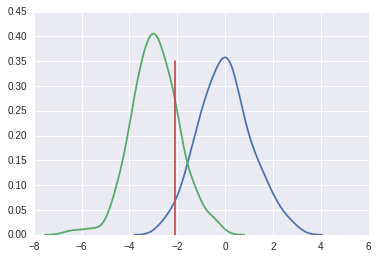

The power for the test is about 80.1% when mutrmt - muctrl = -3 and
each group has a sample size of 251.17.


In [45]:
SE = calc_SE(st,se,size)
ci_e = CI(SE,get_z_star(alpha))
power,beta = compare_densities(d,SE,size,ci_e,draw=True)
print '''The power for the test is about {}% when mutrmt - muctrl = {} and
each group has a sample size of {}.'''. format(round(power,3)*100,d,size)

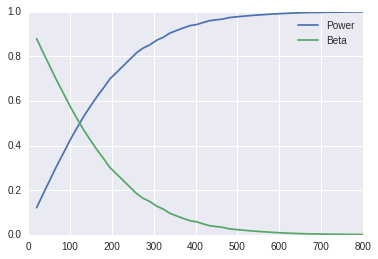

In [21]:
#Figure shows the power for sample sizes from 20 patients to 5,000 patients 
# when α = 0.05 and the true difference is -3. This curve was constructed by 
# writing a program to compute the power for many different sample sizes.

n_s = np.linspace(20,800)
pow_list = []
for n in n_s:
    SE = calc_SE(st,se,n)
    ci_e = CI(SE,get_z_star(alpha))
    pow_list.append( compare_densities(d,SE,n,ci_e))
plt.plot(n_s,[e[0] for e in pow_list],label='Power')
plt.plot(n_s,[e[1] for e in pow_list],label='Beta')
plt.legend();

## 3.b.  Calulate Required Sample Size for Probability Metrics

#### First Way: Works with Analytic Variability

In [22]:
def calc_SE_f(p,N):
    return np.sqrt((p*(1-p)*2)/(N))

def get_beta_f(SE,alpha,d_min):
    beta =  norm.cdf(SE*get_z_star(alpha),loc=abs(d_min),scale=SE)
    return beta     

def find_n_f(d_min,beta,alpha,p):
    SE = abs(d_min)/(norm.isf(beta)+get_z_star(alpha))
    N = round((p*(1-p)*2)/SE**2,0)
    return N

#### Excercise

In [23]:
alpha =.05
beta = .20
d_min=.02
p =.1
size = find_n_f(d_min,beta,alpha,p)
print 'We should target about {} patients per group.'.format(size)
print get_beta_f(calc_SE_f(p,size),alpha,d_min)

We should target about 3532.0 patients per group.
0.200009625691


#### Second Way:  Works with both Analytic  and Empirical Variability

In [24]:
## Strategy: For a bunch of Ns, compute the z_star by achieving desired alpha, then
## compute what beta would be for that N using the acquired z_star. 
## Pick the smallest N at which beta crosses the desired value

def get_beta(d,s,N,z_star):
    SE = s /  np.sqrt(N)
    beta = norm.cdf(SE*z_star, loc=d, scale=SE) 
    return beta 


# Returns: The smallest N out of the given Ns that will achieve the desired
#          beta. There should be at least N samples in each group of the experiment.
#          If none of the given Ns will work, returns -1. N is the number of
#          samples in each group.

def required_size(s,d_min,beta=.2,alpha=.05,Ns=range(20000)):
    for n in Ns:
        if get_beta(d_min,s,n,get_z_star(alpha)) < beta:
            return n

#### Exercise

In [25]:
## alpha = .05
p = .1
d_min= .02
beta = .20
s = np.sqrt(p*(1-p)*2) # standart error for one event
size = required_size(s,d_min,beta,alpha)
print 'We should target about {} patients per group.'.format(size)
get_beta(d_min,s,size,get_z_star(alpha))

We should target about 3533 patients per group.


0.19989861579093071

#### Effects of Changing Unit of Diversion on Sample Size

note: Since the standard error is proportional to 1/sqrt(N); s or the standard error for N=1, is equal to the mesaured standard error with 5000 in each group times sqrt(5000)

In [26]:
# Original size with cookie-based diversion
print required_size(s=0.0628*np.sqrt(1000), d_min=0.01, Ns=np.arange(10, 500000, 100))

309610


In [27]:
# Size with event-based diversion 
# (Unit of diversion is equal to unit of analysis)
# (decreases the variability of metric closer to its analytic estimate)
print required_size(s=0.0209*np.sqrt(1000), d_min=0.01, Ns=np.arange(10, 500000, 100))

34310


In [28]:
# Size with event-based diversion and English-only traffic
print required_size(s=0.0188*np.sqrt(1000), d_min=0.015)

12330


In [29]:
# Size with cookie-based diversion, English-only traffic, and 
# click-through-probability instead of click-through-rate
# (Unit of diversion is equal to unit of analysis)
print required_size(s=0.0445*np.sqrt(1000), d_min=0.015, Ns=np.arange(10, 500000, 100))

69110


[HOME](#home)

<a id='4'></a>

# 4. Tracking Multiple Metrics

#### Overall Alpha Graph with Independence Assumption

For a range of metrics (0-21), this graph show the chance of at least 1 false positive with diffent alpha levels by assuming the metrics are independent from eachother. p(FP>=1) = 1-p(FP=0)

    For ex: The probability of at least one false positive for 10 metrics and 95% confidence level is (also called the alpha overall) .40. (1-.95**10)

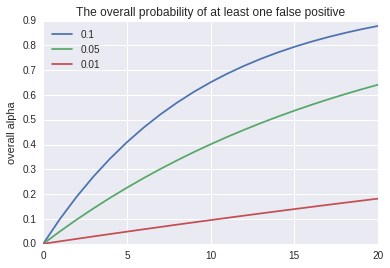

In [30]:
alpha = [.1, .05, .01 ]
no_m = range(21)
fig, ax = plt.subplots(1, 1)
ax.plot(no_m,[round(1-(1-alpha[0])**e,4) for e in no_m],label=alpha[0])
ax.plot(no_m,[round(1-(1-alpha[1])**e,4) for e in no_m],label=alpha[1])
ax.plot(no_m,[round(1-(1-alpha[2])**e,4) for e in no_m],label=alpha[2])
plt.legend(loc=2)
plt.ylabel('overall alpha')
plt.title('The overall probability of at least one false positive');
# conclusion: choosing 0.01 as alpha for large number of metrics is better

#### Bonferroni Correction

In [31]:
# ex
z = 1.96
alpha = .05
d = [.03, -0.5, .01 ,10]
SE =[.013,.21,.0045, 6.85]
# Indepence assumption
z = norm.ppf(1-(alpha)/2)
print abs(d[0])>SE[0]*z,abs(d[1])>SE[1]*z,abs(d[2])>SE[2]*z,abs(d[3])>SE[3]*z
print z,'the critical value with independence assumption'
# Bonferroni correction
bon = norm.ppf(1-(alpha/4)/2)
print abs(d[0])>SE[0]*bon,abs(d[1])>SE[1]*bon,abs(d[2])>SE[2]*bon,abs(d[3])>SE[3]*bon
print bon,'the critical value with bonferroni correction'

True True True False
1.95996398454 the critical value with independence assumption
False False False False
2.49770547441 the critical value with bonferroni correction


Bonferroni correction may be too much conservative. If the metrics are correlated, they probably more likely to move together. In the example, when bonferroni correction is applied with a higher critical value all the changes are not significant.

[HOME](#home)

<a id='5'></a>

# 5. Simulations

## 5.a Comparing Click Through Probabilities

In [32]:
ncont = 10072.
nexp = 9886.
xcont = 974
xexp = 1242
CI = .95 
dmin = .02 #practical sig level
# pooled phat
phat = (xcont+xexp)/(ncont+nexp)
# pooled standart error
SE = np.sqrt(phat*(1-phat)*(1/ncont+1/nexp))
# phats
pcont = xcont/ncont
pexp = xexp/nexp
# difference hat
dhat =  pexp - pcont
# margin of error
alpha = 1-CI
m = SE*norm.ppf(1-alpha/2)
dhat,m,CI_l,CI_h = [round(e,5) for e in [dhat,m,dhat-m,dhat+m]]
print 'The CTP changed by at least {}%  which is bigger than \
the practical significance level {}%\n'.format(CI_l*100,dmin*100)
print 'The confidence interval is ({},{}) at {}% level\
(0 is not in the CI)\n'.format(CI_l,CI_h,CI*100)
print 'The result is both significant from statistical \
and practical point of view , so lunch the new version'

The CTP changed by at least 2.021%  which is bigger than the practical significance level 2.0%

The confidence interval is (0.02021,0.03765) at 95.0% level(0 is not in the CI)

The result is both significant from statistical and practical point of view , so lunch the new version


## 5.b. Analysis with a single metric (CTR)

In [33]:
Xs_cont = [196, 200, 200, 216, 212, 185, 225, 187, 205, 211, 192, 196, 223, 192]
Ns_cont = [2029, 1991, 1951, 1985, 1973, 2021, 2041, 1980, 1951, 1988, 1977, 2019, 2035, 2007]
Xs_exp = [179, 208, 205, 175, 191, 291, 278, 216, 225, 207, 205, 200, 297, 299]
Ns_exp = [1971, 2009, 2049, 2015, 2027, 1979, 1959, 2020, 2049, 2012, 2023, 1981, 1965, 1993]
dmin = .01 # practical sig level
alpha = .05
SE_e = .0062 # empirical se with 5000 pageviews in each group

In [34]:
# Effect size
SE = SE_e / np.sqrt(1./5000 + 1./5000) * np.sqrt(1./ np.sum(Ns_cont) + 1./ np.sum(Ns_exp))
CTR_c = np.sum(Xs_cont)/ np.sum(Ns_cont)
CTR_e = np.sum(Xs_exp)/ np.sum(Ns_exp)
dhat = CTR_e - CTR_c
m = norm.ppf(1-alpha/2) * SE
CI_l,CI_u = (round(dhat-m,4),round(dhat+m,4))
print CI_l,CI_u
# The confidence interval contains practical significance boundary (dmin = .01)

0.0065 0.0167


In [35]:
# Sign Test
CTRs_c = np.array(Xs_cont,dtype=float)/ np.array(Ns_cont)
CTRs_e = np.array(Xs_exp,dtype=float)/ np.array(Ns_exp)
k = np.sum(CTRs_e > CTRs_c) 
n = len(CTRs_c)
p = .5
print "success:",k
print "total:",n
p_value = 2*binom.sf(k-1,n,.5)
print p_value
# This is the chance of observing either 9 or more successes, or 5 or fewer successes,
# in 14 trials. 

success: 9
total: 14
0.423950195312


Effects size show that there is significant difference between CTRs of control and experiment group, but sign test results are insignificant. Therefore, in this case don't lunch the experiment and find the reason why the sign test fails. In this case, check weekends and weekdays seperately.

In [36]:
# weekdays
Xs_cont_w = [Xs_cont[e] for e in range(len(Xs_cont)) if e%7<5]
Ns_cont_w = [Ns_cont[e] for e in range(len(Ns_cont)) if e%7<5]
Xs_exp_w = [Xs_exp[e] for e in range(len(Xs_exp)) if e%7<5]
Ns_exp_w = [Ns_exp[e] for e in range(len(Ns_exp)) if e%7<5]

SE = SE_e / np.sqrt(1./5000 + 1./5000) * np.sqrt(1./ np.sum(Ns_cont_w) + 1./ np.sum(Ns_exp_w))
CTR_c = float(np.sum(Xs_cont_w))/ np.sum(Ns_cont_w)
CTR_e = float(np.sum(Xs_exp_w))/ np.sum(Ns_exp_w)
dhat = CTR_e - CTR_c
m = norm.ppf(1-alpha/2) * SE
CI_l,CI_u = (round(dhat-m,4),round(dhat+m,4))
print CI_l,CI_u   
print 'The confidence interval does NOT contain practical significance boundary (dmin = .01)'

# Sign Test
CTRs_c = np.array(Xs_cont_w,dtype=float)/ np.array(Ns_cont_w)
CTRs_e = np.array(Xs_exp_w,dtype=float)/ np.array(Ns_exp_w)
k = np.sum(CTRs_e > CTRs_c) 
n = len(CTRs_c)
p = .5
print "\nsuccess:",k
print "total:",n
p_value = 2*binom.sf(k-1,n,p)
print p_value
print 'p-value is too big, the sign test also does not have significant results'

-0.0078 0.0043
The confidence interval does NOT contain practical significance boundary (dmin = .01)

success: 5
total: 10
1.24609375
p-value is too big, the sign test also does not have significant results


In [37]:
# weekends
Xs_cont_w = [Xs_cont[e] for e in range(len(Xs_cont)) if e%7>4]
Ns_cont_w = [Ns_cont[e] for e in range(len(Ns_cont)) if e%7>4]
Xs_exp_w = [Xs_exp[e] for e in range(len(Xs_exp)) if e%7>4]
Ns_exp_w = [Ns_exp[e] for e in range(len(Ns_exp)) if e%7>4]

SE = SE_e / np.sqrt(1./5000 + 1./5000) * np.sqrt(1./ np.sum(Ns_cont_w) + 1./ np.sum(Ns_exp_w))
CTR_c = float(np.sum(Xs_cont_w))/ np.sum(Ns_cont_w)
CTR_e = float(np.sum(Xs_exp_w))/ np.sum(Ns_exp_w)
dhat = CTR_e - CTR_c
m = norm.ppf(1-alpha/2) * SE
CI_l,CI_u = (dhat-m,dhat+m)

print CI_l,CI_u    
print 'The confidence interval contains practical significance boundary (dmin = .01)'

# Sign Test
CTRs_c = np.array(Xs_cont_w,dtype=float)/ np.array(Ns_cont_w)
CTRs_e = np.array(Xs_exp_w,dtype=float)/ np.array(Ns_exp_w)
k = np.sum(CTRs_e > CTRs_c) 
n = len(CTRs_c)
p = .5
print "\nsuccess:",k
print "total:",n
p_value = 2*binom.sf(k-1,n,p)
print p_value
print 'p-value is small enough for this case, the sign test has significant results'

0.03613384543 0.0553491151903
The confidence interval contains practical significance boundary (dmin = .01)

success: 4
total: 4
0.125
p-value is small enough for this case, the sign test has significant results


After seperating the data by weekday and weekends, we see that during weekdays there is no significant difference between experiment and the contol group and the sign test states that positive and neg days are seperated equally

On the otherhand weekend data states that experiment group is significantly different from the control group and the sign test shows that the difference is positive (by 4 positive results out of 4 days)


[HOME](#home)